In [1]:
import numpy as np
import random
import math
from math import e
import time

In [2]:
#wymagania poczatkowe dla planszy 9x9
c = 8 #kolumn jest zawsze o 2 wiecej niz faktycznie w planszy
r = 8 #rzedow jest zawsze o 2 wiecej niz faktycznie w planszy
climit = [0,4,1,3,1,0,4,0] #limit w kolumnach
rlimit = [0,3,2,1,3,3,1,0] #limit w wierszach
k = int(sum(climit))

In [3]:
def wypelnij_X(c=c, r=r, k=k):
    x_new = np.zeros((c, r), dtype=int)

    # Wypełnienie obramowań zerami
    x_new[0, :] = 0  # Pierwszy wiersz
    x_new[c-1, :] = 0  # Ostatni wiersz
    x_new[:, 0] = 0  # Pierwsza kolumna
    x_new[:, r-1] = 0  # Ostatnia kolumna
    
    pozostale_k = k  # Liczba pozostałych jedynek do umieszczenia
    
    #dla uproszczenia umieszczam k jedynek na planszy w losowych dozwolonych miejscach 
    while pozostale_k > 0:
        i = random.randint(1, c-2)  # Losowy indeks wiersza
        j = random.randint(1, r-2)  # Losowy indeks kolumny
        
        if x_new[i, j] == 0:
            x_new[i, j] = 1
            pozostale_k -= 1
    
    return x_new


def is_x_valid (x_new):
    #sprawdzanie styku na skosie i styków ortogonalnych
    for i in range(1,r-1):
        for j in range (1,c-1):
            if x_new[i][j] + x_new[i+1][j+1] >1:
                return False
            if x_new[i][j] + x_new[i+1][j-1] >1:
                return False
            if x_new[i][j] + x_new[i-1][j+1] >1:
                return False
            if x_new[i][j] + x_new[i-1][j-1] >1:
                return False
            if x_new[i][j] + x_new[i][j+1] + x_new[i-1][j] >2:
                return False
            if x_new[i][j] + x_new[i][j+1] + x_new[i+1][j] >2:
                return False
            if x_new[i][j] + x_new[i][j-1] + x_new[i-1][j] >2:
                return False
            if x_new[i][j] + x_new[i][j-1] + x_new[i+1][j] >2:
                return False
    return True


In [4]:
def generuj_X(c=c,r=r,k=k):
    x_new = wypelnij_X(c=c, r=r, k=k)
    while is_x_valid(x_new) != True:
        x_new = wypelnij_X(c=c, r=r, k=k)
    return x_new

In [5]:
def policz_koszt(x):
    #sprawdzanie różnicy między sumami wierszy a ograniczeniami wierszy oraz sumami kolumn a ograniczeniami kolumn
    sum_wiersze = np.sum(x[1:-1, 1:-1], axis=1)
    sum_kolumny = np.sum(x[1:-1, 1:-1], axis=0)
    koszt = np.sum(np.abs(sum_wiersze - np.array(rlimit[1:-1]))) + np.sum(np.abs(sum_kolumny - np.array(climit[1:-1])))
    return int(koszt)

Temperatura: 100
Temperatura: 90.0
Temperatura: 81.0
Temperatura: 72.9
Temperatura: 65.61000000000001
Temperatura: 59.049000000000014
Temperatura: 53.144100000000016
Temperatura: 47.829690000000014
Temperatura: 43.04672100000001
Temperatura: 38.742048900000015
Temperatura: 34.86784401000001
Temperatura: 31.381059609000012
Temperatura: 28.242953648100013
Temperatura: 25.41865828329001
Temperatura: 22.87679245496101
Temperatura: 20.58911320946491
Temperatura: 18.53020188851842
Temperatura: 16.67718169966658
Temperatura: 15.009463529699921
Temperatura: 13.50851717672993
Temperatura: 12.157665459056936
Temperatura: 10.941898913151244
Temperatura: 9.847709021836119
Temperatura: 8.862938119652506
Temperatura: 7.9766443076872555
Temperatura: 7.17897987691853
Temperatura: 6.461081889226677
Temperatura: 5.81497370030401
Temperatura: 5.233476330273609
Temperatura: 4.710128697246248
Temperatura: 4.239115827521624
Temperatura: 3.815204244769461
Temperatura: 3.433683820292515
Temperatura: 3.0903154

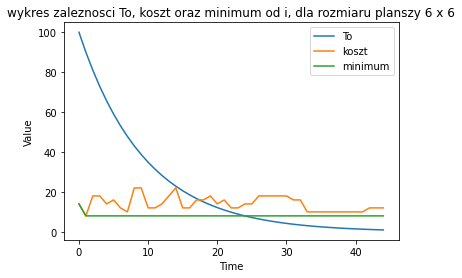

Minimum dla rozmiaru planszy 6 x 6 :8
Minimalne rozwiązanie:
[[0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
czas trwania SA dla rozmiaru planszy 6 x 6: 10.331079244613647


In [6]:
#Symulowane wyżarzanie

#parametry i zmienne początkowe
To = 100
Tk = 1
alfa = 0.90
t = [] 
To_tab = [] #tablica magazynująca wskazania temperatury
To_tab.append(To)

x = generuj_X(c=c,r=r,k=k) #poczatkowy x
koszt_x = policz_koszt(x) #koszt pierwszej próbki
minimum_tab = [] #tablica magazynująca minima
minimum_tab.append(koszt_x)
minimum = koszt_x
minimumX = x #zmienna przechowująca planszę minimalna
koszt_tab = [] #tablica magazynująca koszta plansz
koszt_tab.append(koszt_x)
t.append(0)
 
i = 1
start_time = time.time()
while To > Tk:
        print(f"Temperatura: {To}")
        t.append(i)
        x_new = generuj_X(c, r, k)
        koszt_x_new = policz_koszt(x_new)
        delta = koszt_x_new - koszt_x

        if delta < 0 or random.random() < math.exp(-delta / To):
            x = x_new
            koszt_x = koszt_x_new

        koszt_tab.append(koszt_x)
        if koszt_x < minimum:
            minimum = koszt_x
            minimumX = x_new
        minimum_tab.append(minimum)

        To = To * alfa
        To_tab.append(To)
        i += 1
end_time = time.time()
    
    
from matplotlib import pyplot as plt 
# Wykres To, koszt, minimum od iteracji i
plt.plot(t, To_tab, label='To')
plt.plot(t, koszt_tab, label='koszt')
plt.plot(t, minimum_tab, label='minimum')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'wykres zaleznosci To, koszt oraz minimum od i, dla rozmiaru planszy {c-2} x {c-2}')
plt.legend()
plt.show()
print(f'Minimum dla rozmiaru planszy {c-2} x {c-2} :{minimum}')
print("Minimalne rozwiązanie:")
print(minimumX)
print(f"czas trwania SA dla rozmiaru planszy {c-2} x {c-2}: {end_time - start_time}")                                                                

In [9]:
#wymagania poczatkowe dla planszy 3x3
c = 5
r = 5

climit = [0,2,1,2,0]
rlimit = [0,2,0,3,0]
k = int(sum(climit))

Temperatura: 100
Temperatura: 95.0
Temperatura: 90.25
Temperatura: 85.7375
Temperatura: 81.45062499999999
Temperatura: 77.37809374999999
Temperatura: 73.50918906249998
Temperatura: 69.83372960937498
Temperatura: 66.34204312890623
Temperatura: 63.02494097246091
Temperatura: 59.87369392383786
Temperatura: 56.880009227645964
Temperatura: 54.03600876626366
Temperatura: 51.33420832795048
Temperatura: 48.76749791155295
Temperatura: 46.3291230159753
Temperatura: 44.012666865176534
Temperatura: 41.812033521917705
Temperatura: 39.72143184582182
Temperatura: 37.73536025353073
Temperatura: 35.84859224085419
Temperatura: 34.05616262881148
Temperatura: 32.3533544973709
Temperatura: 30.735686772502355
Temperatura: 29.198902433877237
Temperatura: 27.738957312183373
Temperatura: 26.352009446574204
Temperatura: 25.034408974245494
Temperatura: 23.782688525533217
Temperatura: 22.593554099256554
Temperatura: 21.463876394293724
Temperatura: 20.390682574579035
Temperatura: 19.371148445850082
Temperatura: 18

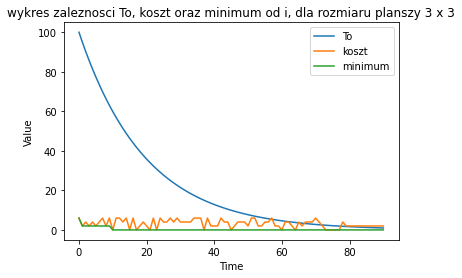

Minimum dla rozmiaru planszy 3 x 3 :0
Minimalne rozwiązanie:
[[0 0 0 0 0]
 [0 1 0 1 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
czas trwania SA dla rozmiaru planszy 3 x 3: 0.08894848823547363


In [10]:
#Symulowane wyżarzanie

#parametry i zmienne początkowe
To = 100
Tk = 1
alfa = 0.95
t = [] 
To_tab = [] #tablica magazynująca wskazania temperatury
To_tab.append(To)

x = generuj_X(c=c,r=r,k=k) #poczatkowy x
koszt_x = policz_koszt(x) #koszt pierwszej próbki
minimum_tab = [] #tablica magazynująca minima
minimum_tab.append(koszt_x)
minimum = koszt_x
minimumX = x #zmienna przechowująca planszę minimalna
koszt_tab = [] #tablica magazynująca koszta plansz
koszt_tab.append(koszt_x)
t.append(0)
 
i = 1
start_time = time.time()
while To > Tk:
        print(f"Temperatura: {To}")
        t.append(i)
        x_new = generuj_X(c, r, k)
        koszt_x_new = policz_koszt(x_new)
        delta = koszt_x_new - koszt_x

        if delta < 0 or random.random() < math.exp(-delta / To):
            x = x_new
            koszt_x = koszt_x_new

        koszt_tab.append(koszt_x)
        if koszt_x < minimum:
            minimum = koszt_x
            minimumX = x_new
        minimum_tab.append(minimum)

        To = To * alfa
        To_tab.append(To)
        i += 1
end_time = time.time()
    
from matplotlib import pyplot as plt 
# Wykres To, koszt,  minimum od iteracji i
plt.plot(t, To_tab, label='To')
plt.plot(t, koszt_tab, label='koszt')
plt.plot(t, minimum_tab, label='minimum')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'wykres zaleznosci To, koszt oraz minimum od i, dla rozmiaru planszy {c-2} x {c-2}')
plt.legend()
plt.show()
print(f'Minimum dla rozmiaru planszy {c-2} x {c-2} :{minimum}')
print("Minimalne rozwiązanie:")
print(minimumX)
print(f"czas trwania SA dla rozmiaru planszy {c-2} x {c-2}: {end_time - start_time}")                                                                